In [17]:
import os

src="./archive/images"
width=150
height=150

data = dict()
data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
data['label'] = [] #Label of the classes
data['filename'] = []
data['data'] = [] 

for subdir in os.listdir(src):
    #subdir will be the filenames
    print(subdir)
    #current_path=os.path.join(src, subdir)
    current_path=src+"/"+subdir
    #print("current_path : ", current_path)
    if(subdir[-3:] in ['png', 'jpg', 'jpeg']):
        im = imread(current_path);
        im = resize(im, (width, height))
        data['target']

maksssksksss0.png
TIKAPOUKA
maksssksksss1.png
TIKAPOUKA
maksssksksss10.png
TIKAPOUKA
maksssksksss100.png
TIKAPOUKA
maksssksksss101.png
TIKAPOUKA
maksssksksss102.png
TIKAPOUKA
maksssksksss103.png
TIKAPOUKA
maksssksksss104.png
TIKAPOUKA
maksssksksss105.png
TIKAPOUKA
maksssksksss106.png
TIKAPOUKA
maksssksksss107.png
TIKAPOUKA
maksssksksss108.png
TIKAPOUKA
maksssksksss109.png
TIKAPOUKA
maksssksksss11.png
TIKAPOUKA
maksssksksss110.png
TIKAPOUKA
maksssksksss111.png
TIKAPOUKA
maksssksksss112.png
TIKAPOUKA
maksssksksss113.png
TIKAPOUKA
maksssksksss114.png
TIKAPOUKA
maksssksksss115.png
TIKAPOUKA
maksssksksss116.png
TIKAPOUKA
maksssksksss117.png
TIKAPOUKA
maksssksksss118.png
TIKAPOUKA
maksssksksss119.png
TIKAPOUKA
maksssksksss12.png
TIKAPOUKA
maksssksksss120.png
TIKAPOUKA
maksssksksss121.png
TIKAPOUKA
maksssksksss122.png
TIKAPOUKA
maksssksksss123.png
TIKAPOUKA
maksssksksss124.png
TIKAPOUKA
maksssksksss125.png
TIKAPOUKA
maksssksksss126.png
TIKAPOUKA
maksssksksss127.png
TIKAPOUKA
maksssksksss128.p

In [53]:
import numpy as np
import pandas as pd
import os

src="./archive/annotations"
width=150
height=150

data = dict()
data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
data['label'] = [] #Label of the classes
data['filename'] = []
data['data'] = [] 

for subdir in os.listdir(src):
    #subdir will be the filenames
    #print(subdir)
    current_path=src+"/"+subdir
    df = pd.read_xml(current_path)
    #num_without_mask = df[df['name'].notnull()]['name'].tolist().count("without_mask");
    series_mask = df[df['name'].notnull()]['name']
    series_mask = series_mask[series_mask!="without_mask"]
    num_mask = series_mask.shape[0]
    if( num_mask>1 ):
        num_mask=1
    data['label'].append(num_mask)
print(len(data['label']))

853


(1440,)


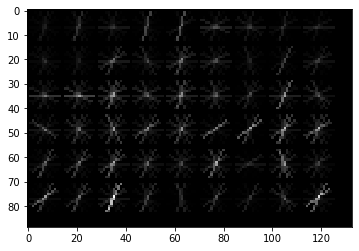

In [44]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
import matplotlib.pyplot as plt
 
mask1 = imread('./archive/images/maksssksksss99.png', as_gray=True)
 
# scale down the image to one third
mask1 = rescale(mask1, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
mask1_hog, mask1_hog_img = hog(
    mask1, pixels_per_cell=(14, 14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
print(mask1_hog.shape)
    
plt.imshow(mask1_hog_img, cmap='gray')
plt.show()

In [3]:
#pip install -U scikit-image

In [3]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

src="./archive/annotations"
width=150
height=150

data = dict()
data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
data['label'] = [] #Label of the classes
data['filename'] = []
data['data'] = [] 

for subdir in os.listdir(src):
    #subdir will be the filenames
    #print(subdir)
    current_path=src+"/"+subdir
    df = pd.read_xml(current_path)
    #num_without_mask = df[df['name'].notnull()]['name'].tolist().count("without_mask");
    series_mask = df[df['name'].notnull()]['name']
    series_mask = series_mask[series_mask!="without_mask"]
    num_mask = series_mask.shape[0]
    if( num_mask>1 ):
        num_mask=1
    data['label'].append(num_mask)

src="./archive/images"

for subdir in os.listdir(src):
    #subdir will be the filenames
    #print(subdir)
    #current_path=os.path.join(src, subdir)
    current_path=src+"/"+subdir
    #print("current_path : ", current_path)
    if(subdir[-3:] in ['png', 'jpg', 'jpeg']):
        img = imread(current_path, as_gray=True);
        # scale down the image to one third
        #img = rescale(img, 1/3, mode='reflect')
        img = resize(img, (width, height)) #[:,:,::-1]
        data['data'].append(img)
        
        # calculate the hog and its visual representation.
        #img_hog, img_hog_image = hog(
        #    img, pixels_per_cell=(14, 14), 
        #    cells_per_block=(2, 2), 
        #    orientations=9, 
        #    visualize=True, 
        #    block_norm='L2-Hys')
        #data['data'].append(img_hog)


In [4]:
from sklearn.model_selection import train_test_split

X = np.array(data['data'])
y = np.array(data['label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
#X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(682, 2916)


In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [11]:
#TESTS
#X_test_gray = grayify.transform(X_test) Pictures in X_test already gray
X_test_hog = hogify.transform(X_test)
X_test_prepared = scalify.transform(X_test_hog)

In [42]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:51])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True False False  True  True  True
  True  True  True]

Percentage correct:  93.5672514619883


NameError: name 'hogify' is not defined

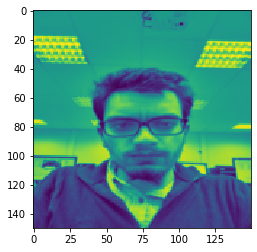

In [6]:
arnaud_img = imread("Arnaud_no_mask_2.jpg", as_gray=True);
arnaud_img = resize(arnaud_img, (width, height)) #[:,:,::-1]
plt.imshow(arnaud_img)

liste=[]
liste.append(arnaud_img)
X_Ara = np.array(liste);

X_Ara_hog = hogify.transform(X_Ara)
X_Ara_prepared = scalify.transform(X_Ara_hog)

In [44]:
y_pred = sgd_clf.predict(X_Ara_prepared)

In [45]:
print(y_pred)

[1]


In [46]:
print("pouet")

pouet
